# 动手实战人工智能

## 1、环境说明
所有内容均使用jupyter notebook进行编写，使用python3.10进行编写，系统为windows11的wsl ubuntu20.04。运行环境为jupyter notebook。



## 2、机器学习综述及示例
### 2.1 介绍
机器学习是概率论、统计学、计算理论、最优化方法、以及计算机科学组成的交叉学科，其主要的研究对象是如何从经验中学习并改善具体算法的性能。

### 2.2 知识点
- 机器学习介绍
- 监督学习介绍
- 无监督学习介绍

### 2.3 机器学习介绍
机器学习Machine Learnning是人工智能的一个分支，其核心构成为机器学习算法，并通过从数据中获取经验来改善自身的性能。机器学习的诞生时间很早，但随着近些年计算机技术及相关领域的迅速发展，机器学习再次变得火热起来。\
A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E. 

机器学习的主要目标是通过从数据中获取经验来改善自身的性能，从而达到预测、分类、聚类、回归等功能。
机器学习的主要分为监督学习和无监督学习。

### 2.4 机器学习&深度学习&人工智能
机器学习的核心是寻求实现人工智能的方法。于是就出现了朴素贝叶斯、决策树学习、人工神经网络等众多机器学习方法。其中，人工神经网络（ANN）是模拟大脑生物结构的一种算法，目前，我们通常所说的「机器学习」大致包含四大类：监督学习，英文为 Supervised Learning；无监督学习，英文为 Unsupervised Learning；半监督学习，英文为 Semi-supervised Learning；强化学习，英文为 Reinforcement Learning。

### 2.5 监督学习方法
supervised learnning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples.
解释一下这句话中的几个关键词。示例输入和输出数据对其实就是训练数据集，而输入指的是训练数据集中的特征变量，输出则是标签。而建立数学函数，实际就是训练机器学习预测模型。这句话，其实就是一个典型的机器学习过程。而监督学习的关键在于，这里提供的训练数据集有标签。


## 3、线性回归实现与应用
### 3.1、介绍
线性回归是一种较为简单，但十分重要的机器学习方法。掌握线性的原理及求解方法，是深入了解线性回归的基本要求。除此之外，线性回归也是监督学习回归部分的基石。

### 3.2、 知识点
- 一元线性回归
- 平方损失函数
- 最小二乘法及代数求解
- 最小二乘法矩阵求解
- 线性回归综合案例

### 3.3、 线性回归介绍
线性回归是一种常见的机器学习算法，它可以用来预测一个连续变量。
线性回归的目标是找到一个函数，使得预测值与真实值之间的差距最小。
线性回归的一般形式为：
$$
y = w_0 + w_1 x_1 + w_2 x_2 +... + w_n x
$$
其中，$w_0$是截距，$w_1, w_2,..., w_n$是权重，$x_1, x_2,..., x_n$是特征。

### 3.4、一元线性回归
上面针对 线性回归 的介绍内容中，我们列举了一个房屋面积与房价变化的例子。其中，房屋面积为自变量，而房价则为因变量。另外，我们将只有 1 个自变量的线性拟合过程叫做一元线性回归。

下面，我们就生成一组房屋面积和房价变化的示例数据。
 $x$为房屋面积，单位是平方米; 
 $y$为房价，单位是万元。

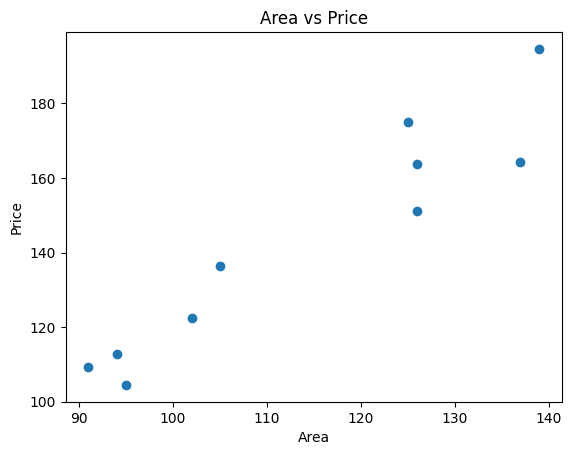

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
x = np.random.randint(90,140,10)
y = [_ * np.random.randint(1,5)*0.1 + _ for _ in x]
plt.scatter(x,y)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.show()
x = x
y = y

正如上面所说，线性回归即通过线性方程去拟合数据点。那么，我们可以令该 1 次函数的表达式为：
$$y(x, w) = w_0 + w_1x \tag{1}$$
公式 $(1)$是典型的一元一次函数表达式，我们通过组合不同的 $w_0$和 $w_1$的值得到不同的拟合直线。接下来，对公式 $(1)$进行代码实现：

In [15]:
def f(x:list,w0:float,w1:float):
    y = w0+w1*x
    return y

### 3.5、 平方损失函数
如果一个数据点$x_{i}$，那么他对应的误差就为：
$$
y_{i}-(w_0 + w_1x_{i}) \tag{2}
$$
上面的误差往往也称之为残差。但在机器学习中，我们更喜欢称之为损失，即真实值与预测值之间的偏离度。那么对$n$个全部数据点而言，其对应的残差损失总和就为：
$$
\sum_{i=1}^{n}(y_{i}-(w_0 + w_1x_{i}))^2 \tag{3}
$$
在上面的公式中，$w_0$和$w_1$是模型的参数，$y_{i}$是真实值，$x_{i}$是特征值。

更进一步，在线性回归中，我们一般使用残差的平方和来表示所有样本点的误差。公式如下：
$$
\sum_{i=1}^{n}(y_{i}-(w_0 + w_1x_{i}))^2 \tag{4}
$$
在上面的公式中，$w_0$和$w_1$是模型的参数，$y_{i}$是真实值，$x_{i}$是特征值。

使用残差平方和的好处在于能保证损失始终是累加的正数，而不会存在正负残差抵消的问题。对于公式$（4）$而言，机器学习中有一个专门的名词，就是平方损失函数。而为了得到拟合参数$w_0$和$w_1$，我们需要最小化平方损失函数。


In [17]:
# 我们对公式4进行代码实现
def square_loss(x:np.ndarray,y:np.ndarray,w0:float,w1:float):
    loss = sum(np.square(y-(w0+w1*x)))
    return loss

如果某条直线拟合样本得到的总损失最小，那么这条直线就是最终想得到的结果，而求解最损失最小值的过程，就必须用到下面的数学方法。

### 3.6、 最小二乘法代数求解
最小二乘法是用于求解线性回归拟合参数$w$的一种常用方法。最小二乘法中的二乘代表平法，最小二乘法也就是最小平法。而这里的平方就是指代上面的平方损失函数（loss）。
求解便需用到高等数学中的知识。推导如下：

首先，平方损失函数为：
$$
f = \sum\limits_{i = 1}^n {{{(y_{i}-(w_0 + w_1x_{i}))}}^2} \tag{5}
$$
我们的目标是求取平方损失函数$ming(f)$最小时，对应的$w$。首先求$f$的1阶偏导数：
$$\frac{\partial f}{\partial w_{0}}=-2(\sum_{i=1}^{n}{y_i}-nw_{0}-w_{1}\sum_{i=1}^{n}{x_i}) \tag{6a}$$
$$\frac{\partial f}{\partial w_{1}}=-2(\sum_{i=1}^{n}{x_iy_i}-w_{0}\sum_{i=1}^{n}{x_i}-w_{1}\sum_{i=1}^{n}{x_i}^2) \tag{6b}$$

然后，我们令$\frac{\partial f}{\partial w_{0}}=0$以及$\frac{\partial f}{\partial w_{1}}=0$，得到：
$$w_{1}=\frac {n\sum_{}^{}{x_iy_i}-\sum_{}^{}{x_i}\sum_{}^{}{y_i}} {n\sum_{}^{}{x_i}^2-(\sum_{}^{}{x_i})^2} \tag{7b}$$
$$w_{0}=\frac {\sum_{}^{}{x_i}^2\sum_{}^{}{y_i}-\sum_{}^{}{x_i}\sum_{}^{}{x_iy_i}} {n\sum_{}^{}{x_i}^2-(\sum_{}^{}{x_i})^2} \tag{7b}$$
现在，我们已经求出了平方损失函数最小时对应的$w$参数值，这也就是最佳拟合直线。下面我们将公式进行代码实现。


In [18]:
def least_squares_algebraic(x:np.ndarray,y:np.ndarray):
    n = x.shape[0]
    w0 = (sum(x**2)*sum(y)-sum(x)*sum(x*y)) / (n*sum(x**2)-sum(x)**2)
    w1 = (n*sum(x*y)-sum(x)*sum(y)) / (n*sum(x**2)-sum(x)**2)
    return w0,w1

现在传入我们之前生成的$x$,$y$数据到这个函数后便可得到$w_0$和$w_1$的值。

In [19]:
least_squares_algebraic(x,y)

(-38.071111111112465, 1.5922027290448495)

我们也可以求得此时对应的平方损失函数

In [20]:
w0 = least_squares_algebraic(x,y)[0]
w1 = least_squares_algebraic(x,y)[1]
square_loss(x,y,w0,w1)

842.7368654970767

接下来，我们尝试将拟合得到的直线绘制到原图中：

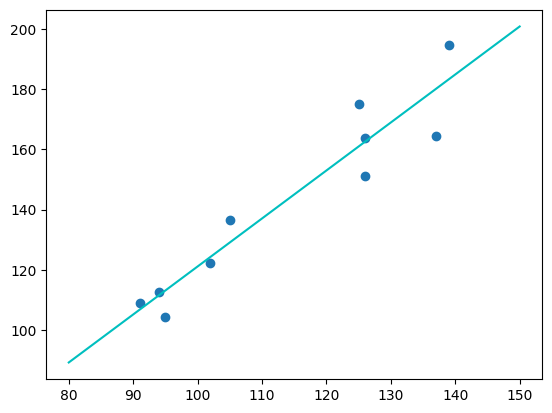

In [22]:
x_temp = np.linspace(80,150,100)

plt.scatter(x,y)
plt.plot(x_temp,w0+w1*x_temp,"c")
plt.show()

于是我们便可以用该函数进行预测了，如果你有一个180平方的房子想出售，你只需将参数带入即可。

In [23]:
f(180,w0,w1)

248.52538011696046

这里得到180平方的房子预估为248.52万。这就是一个最小二乘法求解线性回归问题的完整过程。

### 3.7、 最小二乘法的矩阵求解
首先，一元线性函数的表达式为 $y(x, w) = w_0 + w_1x$，表达成矩阵形式为:
$$\begin{split}
\left[ \begin{array}{c}{1, x_{1}} \\ {1, x_{2}} \\ {\cdots} \\ {1, x_{9}} \\ {1, x_{10}}\end{array}\right] \left[ \begin{array}{c}{w_{0}} \\ {w_{1}}\end{array}\right] = \left[ \begin{array}{c}{y_{1}} \\ {y_{2}} \\ {\cdots} \\ {y_{9}} \\ {y_{10}}\end{array}\right] \Rightarrow \left[ \begin{array}{c}{1,\cdots} \\ {1,\cdots} \\ {\cdots} \\ {1,\cdots} \\ {1,\cdots}\end{array}\right] \left[ \begin{array}{c}{w_{0}} \\ {w_{1}}\end{array}\right]=\left[ \begin{array}{c}{\cdots} \\ {\cdots} \\ {\cdots} \\ {\cdots} \\ {\cdots}\end{array}\right]
\end{split}$$

即：
$$y(x, w) = XW \tag{8b}$$

$(8)$式中，$W$为$\begin{bmatrix}w_{0}\\ w_{1}\end{bmatrix}$,而$X$则是$\begin{bmatrix}1, x_{1}\\ 1, x_{2}\\ \cdots\\ 1, x_{9}\\ 1, x_{10}\end{bmatrix}$矩阵。然后，平方损失函数为：$$f = \sum\limits_{i = 1}^n {{{(y_{i}-(w_0 + w_1x_{i}))}}}^2 =(y-XW)^T(y-XW)\tag{9}$$
通过对公式$(9)$实施矩阵计算乘法分配律得到：
$$f = y^{T}y - y^{T}(XW) - (XW)^{T}y + (XW)^{T}(XW) \tag{10}$$
在该公式中$y$与$XW$皆为相同形式的$(m,1)$矩阵，由此两者相乘属于线性关系，可等价转换如下：
$$\begin{split}
f = y^{T}y - (XW)^{T}y - (XW)^{T}y + (XW)^{T}(XW)\\ = y^{T}y - 2 (XW)^{T}y + (XW)^{T}(XW)
\end{split}$$
对矩阵求偏导数得到：
$$\frac{\partial f}{\partial W}=2X^TXW-2X^Ty=0 \tag{12}$$
当矩阵$X^TX$满秩时，$(X^TX)^{-1}X^TX=E$,且$EW=W$。所以有$(X^TX)^{-1}X^TXW=(X^TX)^{-1}X^Ty$，并最终得到：
$$W=(X^TX)^{-1}X^Ty \tag{13}$$

In [30]:
# 对公式13进行代码实现
def least_squares_matrix(X:np.matrix, Y:np.matrix):
    w = (X.T * X).I * X.T * Y
    return w

计算时，需要参考上方计算公式对原$x$数据添加截距项系数 1，这里使用 ```np.hstack``` 方法。

In [26]:
x_matrix = np.matrix(np.hstack((np.ones((x.shape[0], 1)), x.reshape(x.shape[0], 1))))
y = np.array(y)
y_matrix = np.matrix(y.reshape(y.shape[0], 1))
x_matrix, y_matrix

(matrix([[  1., 102.],
         [  1.,  95.],
         [  1.,  94.],
         [  1., 126.],
         [  1., 125.],
         [  1., 137.],
         [  1., 105.],
         [  1., 139.],
         [  1., 126.],
         [  1.,  91.]]),
 matrix([[122.4],
         [104.5],
         [112.8],
         [151.2],
         [175. ],
         [164.4],
         [136.5],
         [194.6],
         [163.8],
         [109.2]]))

In [32]:
least_squares_matrix(x_matrix, y_matrix),least_squares_algebraic(x,y)

(matrix([[-38.07111111],
         [  1.59220273]]),
 (-38.071111111112465, 1.5922027290448495))

通过对比，两种方法计算的结果一致。为什么要采用矩阵变换的方式计算？一开始学习的代数计算方法不好吗？其实，并不是说代数计算方式不好，在小数据集下二者运算效率接近。但是，当我们面对十万或百万规模的数据时，矩阵计算的效率就会高很多，这就是为什么要学习矩阵计算的原因

### 3.8、 线性回归scikit-learn实现
上面的内容中，我们学习了什么是最小二乘法，以及使用 Python 对最小二乘线性回归进行了完整实现。那么，我们如何利用机器学习开源模块 scikit-learn 实现最小二乘线性回归方法呢？

使用 scikit-learn 实现线性回归的过程会简单很多，这里要用到```LinearRegression()```类。看一下其中的参数:

```sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)```

- fit_intercept: 默认为 True，计算截距项。
- normalize: 默认为 False，不针对数据进行标准化处理。
- copy_X: 默认为 True，即使用数据的副本进行操作，防止影响原数据。
- n_jobs: 计算时的作业数量。默认为 1，若为 -1 则使用全部 CPU 参与运算。

In [33]:
from sklearn.linear_model import LinearRegression

# 定义线性回归模型
model = LinearRegression()
model.fit(x.reshape(x.shape[0], 1), y)  # 训练, reshape 操作把数据处理成 fit 能接受的形状

# 得到模型拟合参数
model.intercept_, model.coef_

(-38.071111111111065, array([1.59220273]))

In [36]:
# 通过模型预测
model.predict([[180]]),f(180,w0,w1)

(array([248.52538012]), 248.52538011696046)

可以看到，这里得出的结果和自行实现计算的结果是一致的。

### 3.10、总结
我们从线性回归原理入手，学习了最小二乘法的两种求解方法，并针对线性回归算法进行了完整实现。在这个过程中，你了解到了机器学习的训练和预测流程，以及背后的数学思想。

总结而来，一个机器学习过程往往包含训练和预测两部分，训练好的模型可用于对未知数据的预测。而训练模型的过程，实际上是应用机器学习算法解决问题的过程。其中，我们通常会定义一个损失函数（平方损失函数），并使用一种数学优化方法（最小二乘法）去求解该损失函数的最优解。这个思想将始终贯穿于机器学习之中。

## 4、 线性回归房价预测
### 4.1、 本次挑战中，运用从线性回归中学习到的相关知识，来预测北京市的住房价格。
### 4.2、 知识点
- 数据集读取与划分
- 模型训练及预测
- 模型评价

### 4.3、 数据集读取与划分


In [7]:
import pandas as pd 
data = pd.read_csv('../data/beijing.csv')
data.head()

,公交,写字楼,医院,商场,地铁,学校,小区名字,建造时间,房型,楼层,每平米价格,面积
0,18,18,10,0,2,49,远洋山水,2006,2室1厅,26,60937,96
1,17,42,10,0,4,37,椿树园,1998,3室1厅,14,88686,130
2,18,36,9,0,1,24,永乐小区,1989,3室1厅,18,46621,74
3,15,49,13,0,2,45,主语家园,2007,4室3厅,2,86147,462
4,6,0,0,0,0,0,天伦锦城,2007,1室1厅,13,42500,64


In [2]:
# 分割数据构建特征列和目标值列
features = data[['公交','写字楼','医院','商场','地铁','学校','建造时间','楼层','面积']]
target = data['每平米价格']
pd.concat([features,target],axis=1).head()

,公交,写字楼,医院,商场,地铁,学校,建造时间,楼层,面积,每平米价格
0,18,18,10,0,2,49,2006,26,96,60937
1,17,42,10,0,4,37,1998,14,130,88686
2,18,36,9,0,1,24,1989,18,74,46621
3,15,49,13,0,2,45,2007,2,462,86147
4,6,0,0,0,0,0,2007,13,64,42500


In [5]:
# 分割训练集与测试集
from sklearn.model_selection import train_test_split
X = features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(2100, 2100, 900, 900)

### 4.4、 模型训练及预测
有了训练和测试数据，下面就可以开始构建机器学习模型。这里直接使用 scikit-learn 中的线性回归方法建立模型。


In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# 查看参数
model.coef_

array([-4.58049037e+02,  2.39740827e+02,  5.27401537e+02, -5.90461013e-12,
        1.90371450e+03,  3.89367581e+02, -6.07946160e+00,  1.09838790e+02,
        3.88387792e+01])

### 4.5、 模型评价
在线性回归实验中，我们提供了两种回归预测结果的评价指标，分别是平均绝对误差 MAE 和均方误差 MSE。本次挑战中，我们另介绍一种评价指标，那就是平均绝对百分比误差 MAPE。
MAPE 是一个百分比值，因此比其他统计量更容易理解。例如，如果 MAPE 为 $5$，则表示预测结果较真实结果平均偏离 $5%$。MAPE 的计算公式如下：
$$\textrm{MAPE}(y, \hat{y} ) = \frac{\sum_{i=1}^{n}{|\frac{y_{i}-\hat y_{i}}{y_{i}}|}}{n} \times 100 \tag{1}$$
其中，$y_i$表示真实值，$\hat y_{i}$表示预测值，$n$则表示值的个数。MAPE 的值越小，说明预测模型拥有更好的精确度。


In [9]:
import numpy as np

def mape(y_true, y_pred):
    n = len(y_true)
    mape = 100 * np.sum(np.abs((y_true-y_pred)/y_true)) / n
    return mape

In [10]:
y_true = y_test.values
y_pred = model.predict(X_test)
mape(y_true, y_pred)

46.95559808873634

可以看到，最终得到的 MAPE 值较大，意味着预测的偏移量较大。在线性回归实验中，我们提到预测结果较差的一个原因可能是数据没有经过预处理。除此之外，线性回归本身就是一种非常基础简单的预测方法。对于房价这种包含多个特征的预测问题，我们往往要使用更复杂的方法来进行回归预测才能得到更好的结果。